#LOAN PREDICTION PROJECT
Background: Without sufficient information indicating the willingness and ability of borrowers to return the loan borrowed, banks are unable to decide the appropriate amount to lend to borrowers.

Project Objective: Examine a set of data acquired from a bank to decide how much loan a borrower is eligible to take out based on the borrower's background. The data will be analyzed to explore existing trends and correlations between the dependent variable and the independent variables.



##Data Wrangling

###Data Collecting

In [ ]:
#Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Loading the CSV
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


###Data Assessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
#Find general information about the numerical data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
#Check for duplicates
df.duplicated().nunique()

1

###Data Cleaning

In [ ]:
#We must remove the columns that are not important for determining how much loan the user can take
df = df.drop(['Loan_ID'], axis=1, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [ ]:
#We must remove the rows which have null values in order to make our data as reliable as possible
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             289 non-null    object 
 1   Married            289 non-null    object 
 2   Dependents         289 non-null    object 
 3   Education          289 non-null    object 
 4   Self_Employed      289 non-null    object 
 5   ApplicantIncome    289 non-null    int64  
 6   CoapplicantIncome  289 non-null    int64  
 7   LoanAmount         289 non-null    float64
 8   Loan_Amount_Term   289 non-null    float64
 9   Credit_History     289 non-null    float64
 10  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 27.1+ KB


In [ ]:
#Delete the duplicate
df = df.drop_duplicates(subset=None, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             288 non-null    object 
 1   Married            288 non-null    object 
 2   Dependents         288 non-null    object 
 3   Education          288 non-null    object 
 4   Self_Employed      288 non-null    object 
 5   ApplicantIncome    288 non-null    int64  
 6   CoapplicantIncome  288 non-null    int64  
 7   LoanAmount         288 non-null    float64
 8   Loan_Amount_Term   288 non-null    float64
 9   Credit_History     288 non-null    float64
 10  Property_Area      288 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 27.0+ KB


In [ ]:
#We have to change all the categorical data
cat_feats = pd.get_dummies(df['Property_Area'])
cat_feats

,Rural,Semiurban,Urban
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
361,0,1,0
362,0,0,1
363,0,0,1
365,1,0,0


In [ ]:
df_encoded = df.join(cat_feats)
df_encoded = df_encoded.drop('Property_Area',axis = 1)
df_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,0,0,1
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,0,0,1
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,0,0,1
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,0,0,1
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,0,0,1


In [ ]:
self_employed = {'Self_Employed': {'No': 0, 'Yes': 1}}
edu = {'Education': {'Not Graduate': 0, 'Graduate': 1}}
married = {'Married': {'No': 0, 'Yes': 1}}
gender = {'Gender': {'Male': 0, 'Female': 1}}
dependents = {'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3 }}

df_encoded = df_encoded.replace(self_employed)
df_encoded = df_encoded.replace(edu)
df_encoded = df_encoded.replace(married)
df_encoded = df_encoded.replace(gender)
df_encoded = df_encoded.replace(dependents)
df_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,0,0,1
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,0,0,1
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,0,0,1
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,0,0,1
5,0,1,0,0,1,2165,3422,152.0,360.0,1.0,0,0,1


In [ ]:
df_encoded.info()
#There are no more non-null values and all the types are correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             288 non-null    int64  
 1   Married            288 non-null    int64  
 2   Dependents         288 non-null    int64  
 3   Education          288 non-null    int64  
 4   Self_Employed      288 non-null    int64  
 5   ApplicantIncome    288 non-null    int64  
 6   CoapplicantIncome  288 non-null    int64  
 7   LoanAmount         288 non-null    float64
 8   Loan_Amount_Term   288 non-null    float64
 9   Credit_History     288 non-null    float64
 10  Rural              288 non-null    uint8  
 11  Semiurban          288 non-null    uint8  
 12  Urban              288 non-null    uint8  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 35.6 KB


In [ ]:
df_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,0,0,1
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,0,0,1
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,0,0,1
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,0,0,1
5,0,1,0,0,1,2165,3422,152.0,360.0,1.0,0,0,1


##Exploratory Data Analysis

###Multivariate

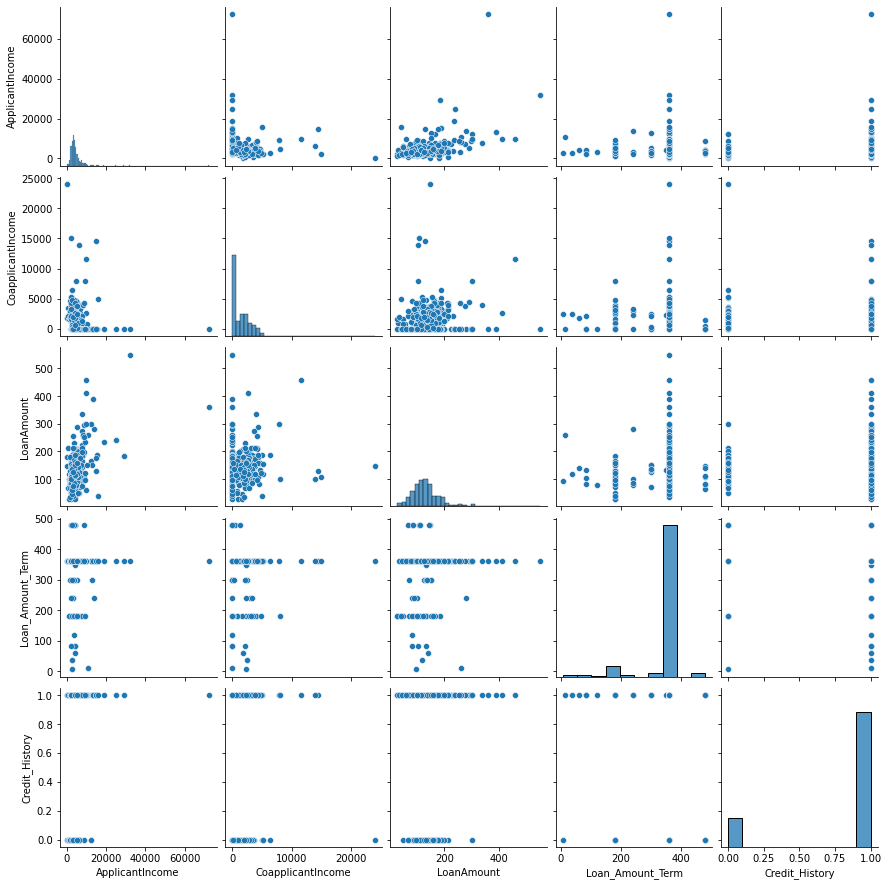

In [ ]:
#To see the overall correlation between columns
sns.pairplot(df);

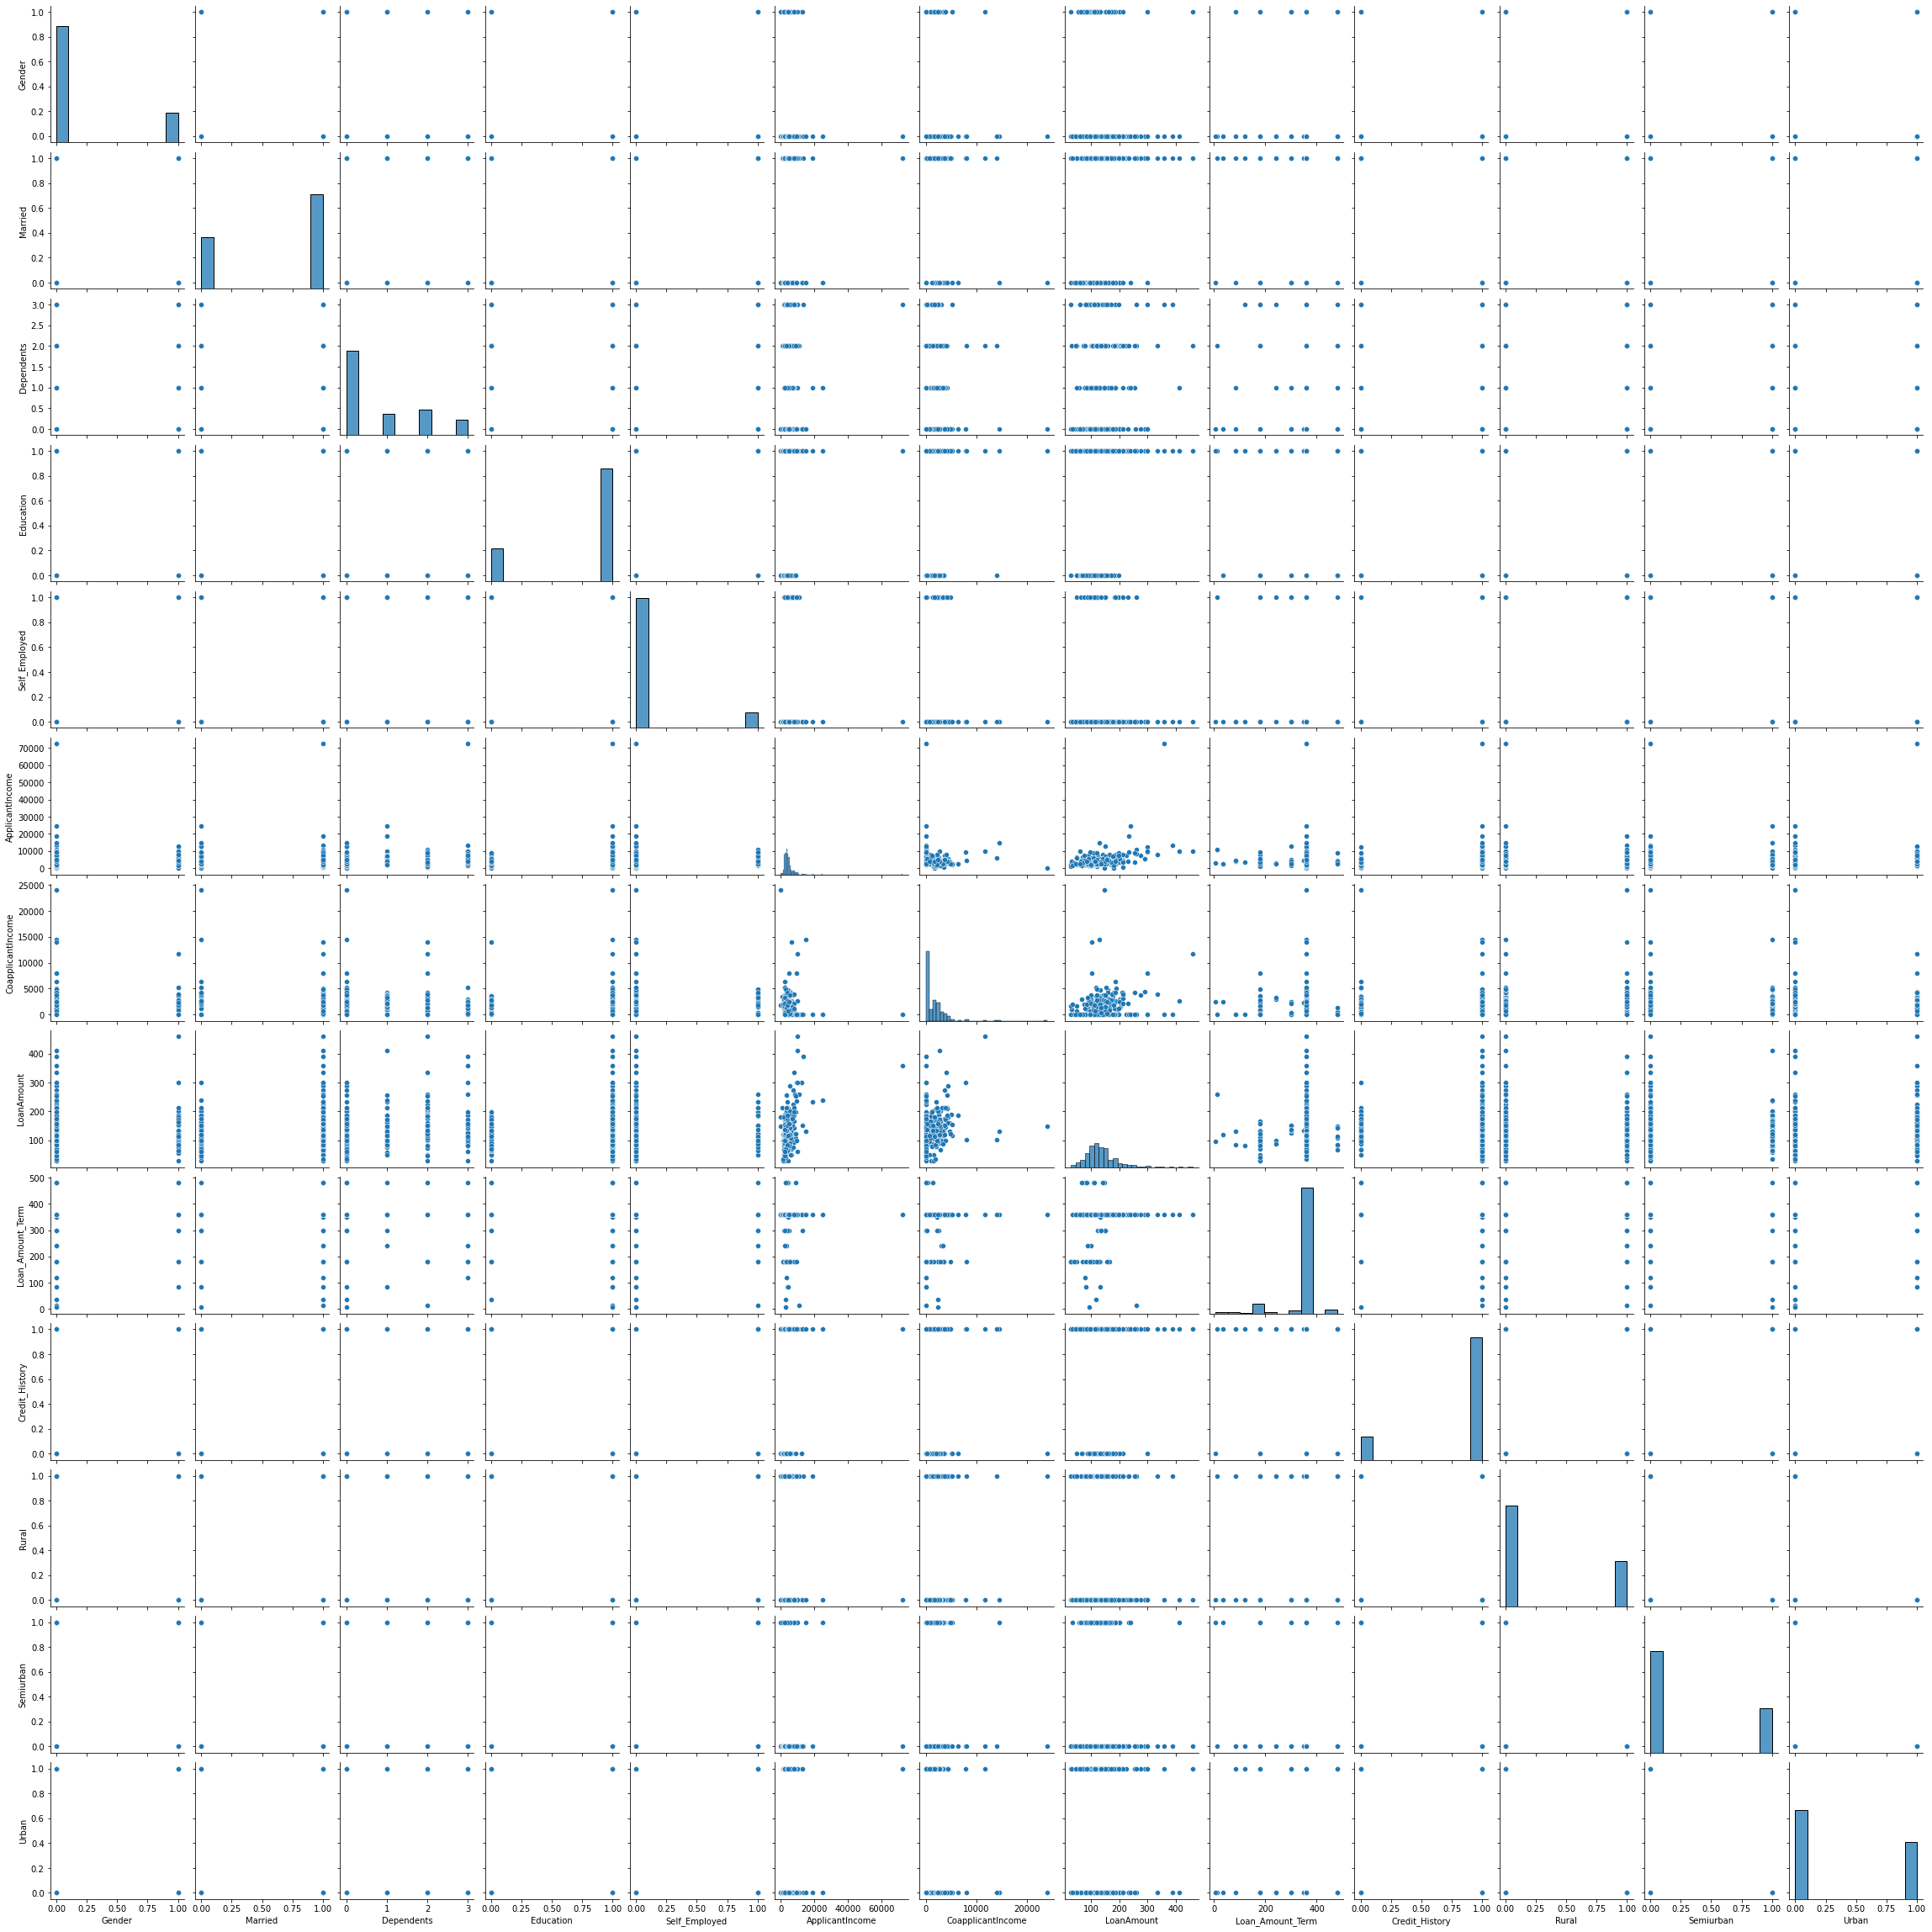

In [ ]:
sns.pairplot(df_encoded);

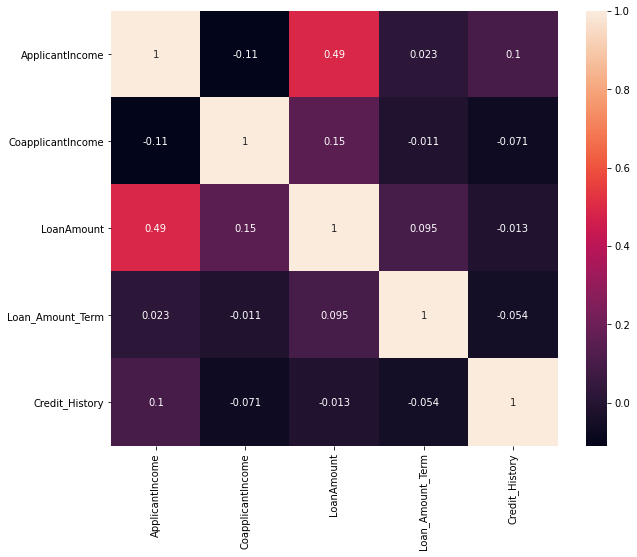

In [ ]:
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Correlation Heatmap')

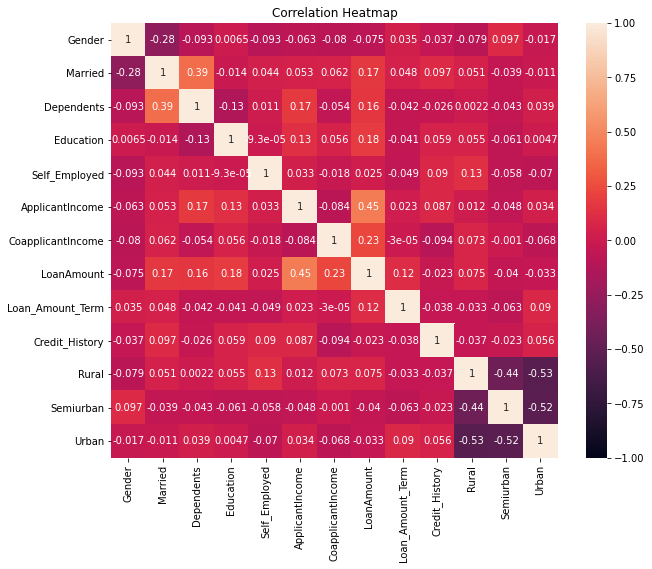

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap');

### Univariate Questions

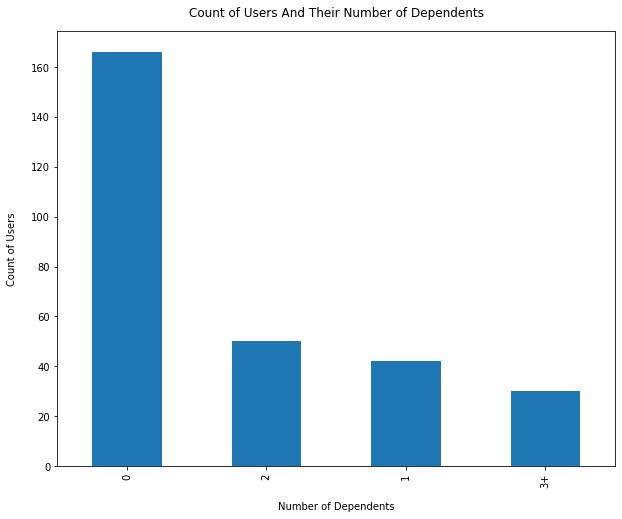

In [ ]:
#Question 1 : How many dependents do the individuals have?
df['Dependents'].value_counts().plot.bar(figsize=(10, 8));
plt.xlabel("Number of Dependents", labelpad=14)
plt.ylabel("Count of Users", labelpad=14)
plt.title("Count of Users And Their Number of Dependents", y=1.02);

In [ ]:
df['Dependents'].value_counts()

0     166
2      50
1      42
3+     30
Name: Dependents, dtype: int64

Observation: A large portion of the loans issued (more than 50%) are to borrowers without any dependents, whereas less than 17% are issued to those with 1 or more dependents.

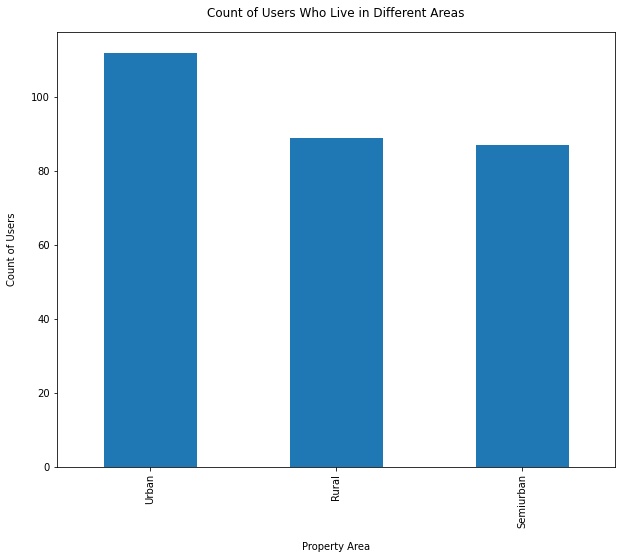

In [ ]:
#Question 2 : Which area do the individuals live in?
df['Property_Area'].value_counts().plot.bar(figsize=(10, 8));
plt.xlabel("Property Area", labelpad=14)
plt.ylabel("Count of Users", labelpad=14)
plt.title("Count of Users Who Live in Different Areas", y=1.02);

In [ ]:
df['Property_Area'].value_counts()

Urban        112
Rural         89
Semiurban     87
Name: Property_Area, dtype: int64

Observation: The biggest demographic taking out loans is those living in urban areas, followed by rural, and then semi-urban. This could be motivated by generally higher living costs in urban areas, and banks would be more likely to borrow because of generally higher income made in urban areas.

###Bivariate Questions

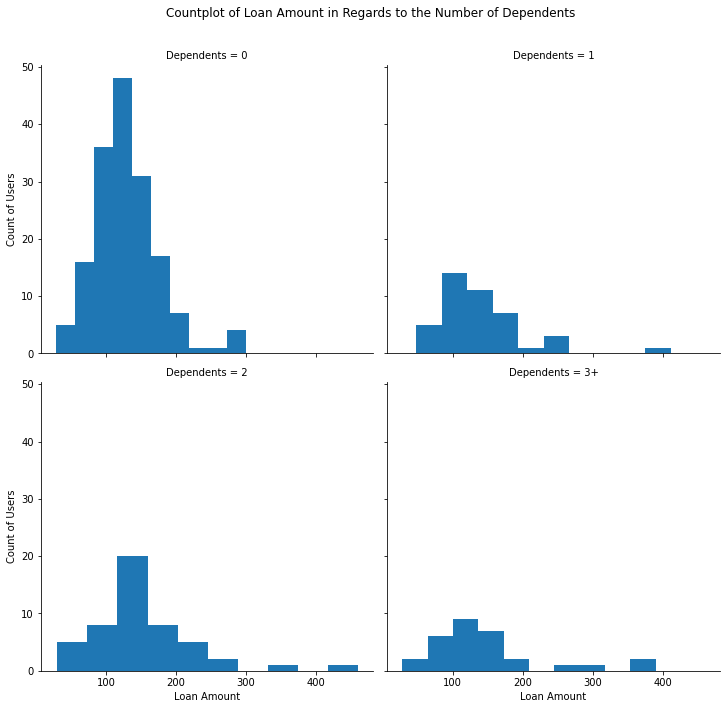

In [ ]:
#Question 3 : Does the number of dependents affect loan amount?
x = sns.FacetGrid(data = df, col = 'Dependents', col_wrap = 2, height = 5, margin_titles = True);
x.map(plt.hist, "LoanAmount").set_axis_labels("Loan Amount", "Count of Users");
plt.subplots_adjust(top=0.9);
x.fig.suptitle('Countplot of Loan Amount in Regards to the Number of Dependents');

Observation: Most users have 0 dependents. There is no specific relationship as the loan amount increases as the number of dependents increase, but suddenly decreases when there are 3 or more dependents.

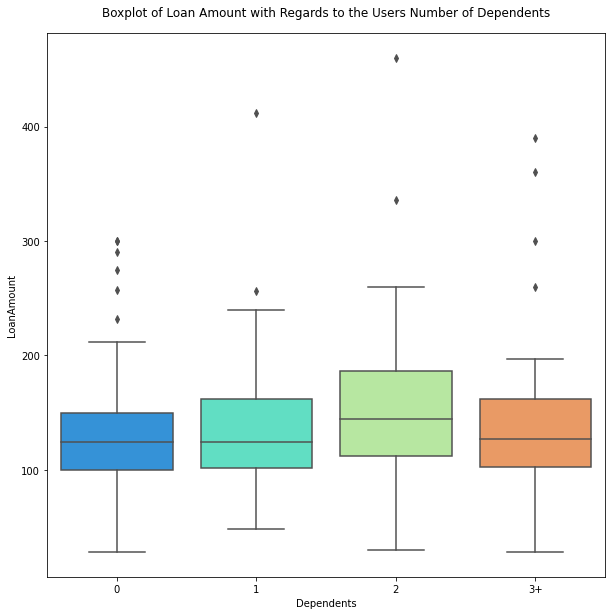

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Dependents', y = 'LoanAmount', data = df, palette = 'rainbow');
plt.title("Boxplot of Loan Amount with Regards to the Users Number of Dependents", y=1.02);

Observation: Graph shows substantial amount of outliers in data which could indicate a moderately weak relationship between loan amount and number of dependents. The increase and eventual decrease of loan amount as the number of depedents increase can be explained by stage of life borrower is in––usually more successful when they settle and number of dependent family members grow

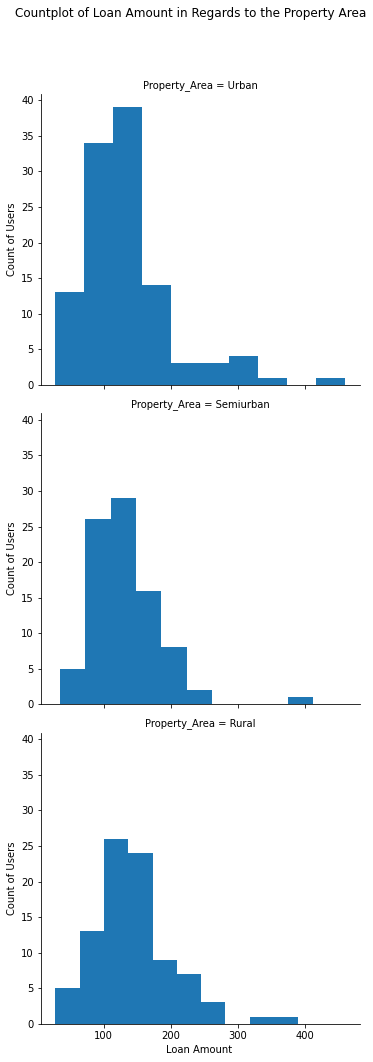

In [ ]:
#Question 4 : Does the property area affect loan amount?
x = sns.FacetGrid(data = df, col = 'Property_Area', col_wrap = 1, height = 5, margin_titles = True);
x.map(plt.hist, "LoanAmount").set_axis_labels("Loan Amount ", "Count of Users");
plt.subplots_adjust(top=0.9);
x.fig.suptitle('Countplot of Loan Amount in Regards to the Property Area');

Observation: Most users live in the urban area. The loan amount is highest with users living in rural areas, and lowest with users living in urban areas.

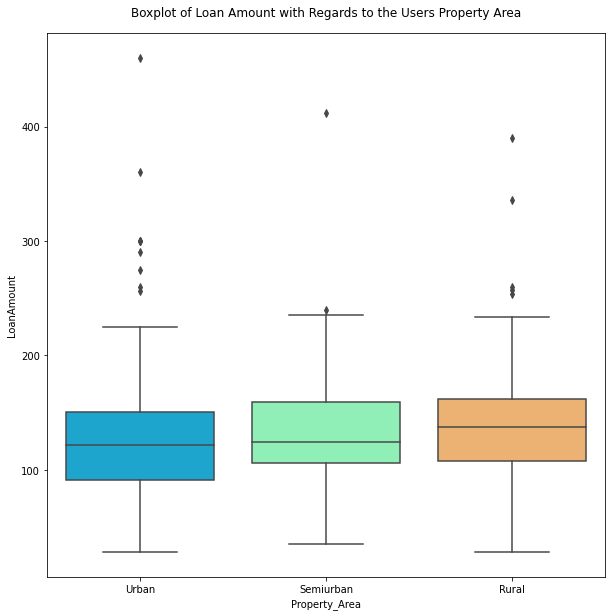

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df, palette = 'rainbow');
plt.title("Boxplot of Loan Amount with Regards to the Users Property Area", y=1.02);


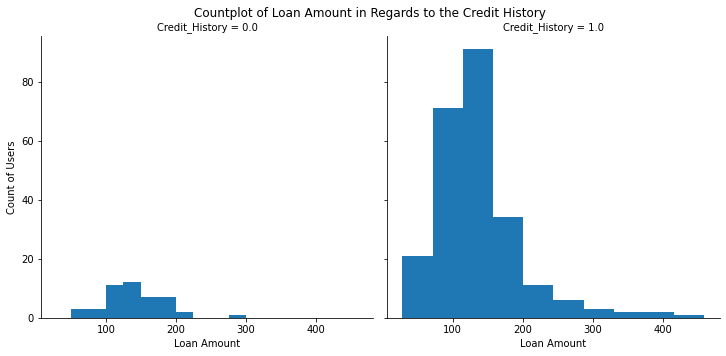

In [ ]:
#Question 5 : How does credit history affect the users loan amount?
x = sns.FacetGrid(data = df, col = 'Credit_History', col_wrap = 2, height = 5, margin_titles = True);
x.map(plt.hist, "LoanAmount").set_axis_labels("Loan Amount", "Count of Users");
plt.subplots_adjust(top=0.9);
x.fig.suptitle('Countplot of Loan Amount in Regards to the Credit History');

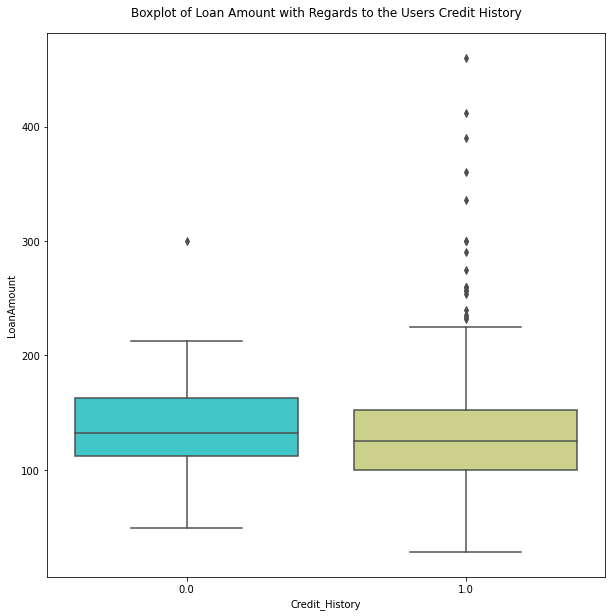

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Credit_History', y = 'LoanAmount', data = df, palette = 'rainbow');
plt.title("Boxplot of Loan Amount with Regards to the Users Credit History", y=1.02);

Observation: The median loan amount of users with a credit history of 1 is lower. Though, there are many outliers.

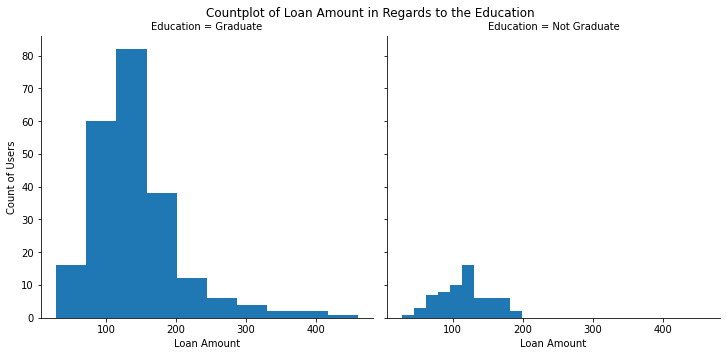

In [ ]:
#Question 6 : How does education affect the users loan amount?
x = sns.FacetGrid(data = df, col = 'Education', col_wrap = 2, height = 5, margin_titles = True);
x.map(plt.hist, "LoanAmount").set_axis_labels("Loan Amount", "Count of Users");
plt.subplots_adjust(top=0.9);
x.fig.suptitle('Countplot of Loan Amount in Regards to the Education');

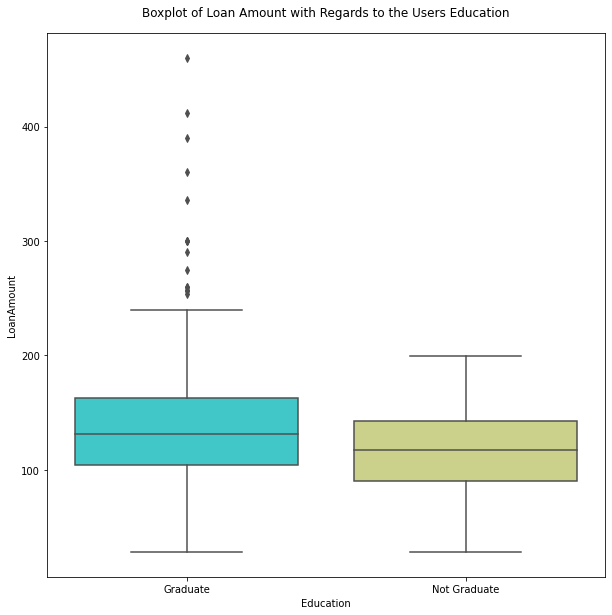

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Education', y = 'LoanAmount', data = df, palette = 'rainbow');
plt.title("Boxplot of Loan Amount with Regards to the Users Education", y=1.02);

Observation: Those who are graduates take higher loans then those who are not.

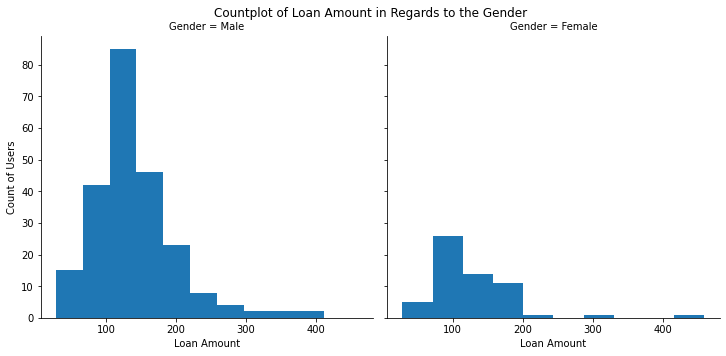

In [ ]:
#Question 7 : Does gender have any impact on loan amount?
x = sns.FacetGrid(data = df, col = 'Gender', col_wrap = 2, height = 5, margin_titles = True);
x.map(plt.hist, "LoanAmount").set_axis_labels("Loan Amount", "Count of Users");
plt.subplots_adjust(top=0.9);
x.fig.suptitle('Countplot of Loan Amount in Regards to the Gender');

Observation: More males take out loans than females, and the loan amount taken out is also higher.

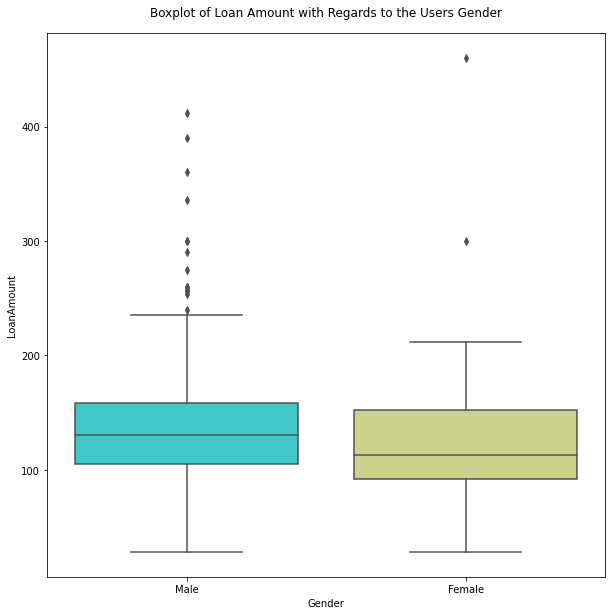

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Gender', y = 'LoanAmount', data = df, palette = 'rainbow');
plt.title("Boxplot of Loan Amount with Regards to the Users Gender", y=1.02);

Observation: Males take higher loans than females but the highest loan amount taken out is by a female.

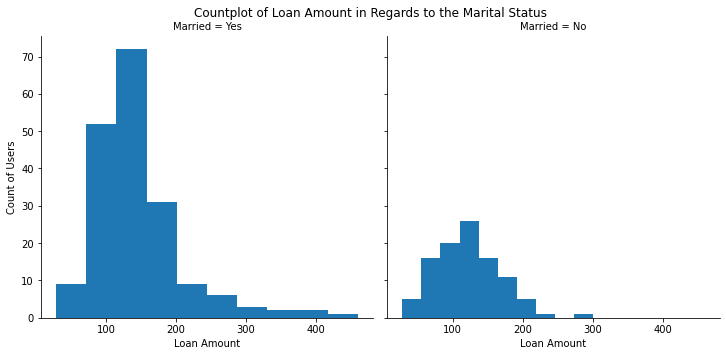

In [ ]:
#Question 8 : Does marriage have any impact on loan amount?
x = sns.FacetGrid(data = df, col = 'Married', col_wrap = 2, height = 5, margin_titles = True);
x.map(plt.hist, "LoanAmount").set_axis_labels("Loan Amount", "Count of Users");
plt.subplots_adjust(top=0.9);
x.fig.suptitle('Countplot of Loan Amount in Regards to the Marital Status');

Observation: More borrowers are married people than unmarried, and they are able to take out more loans. This is likely because married people generally have steadier incomes than unmarried people.

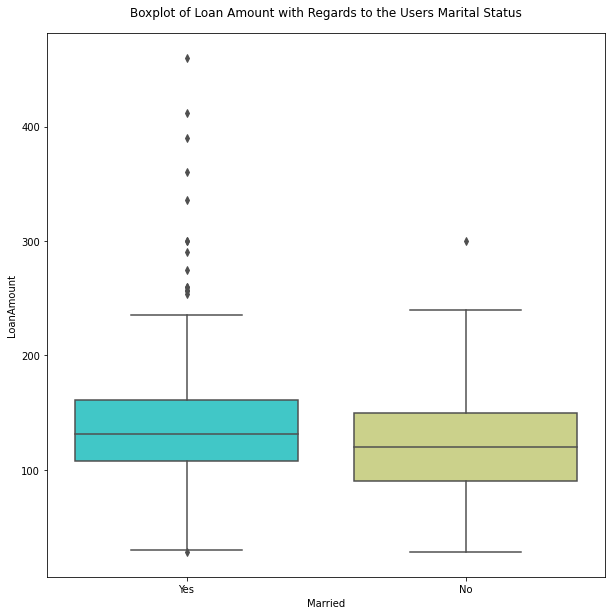

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Married', y = 'LoanAmount', data = df, palette = 'rainbow');
plt.title("Boxplot of Loan Amount with Regards to the Users Marital Status", y=1.02);

Observation: Those who are married take higher loans than those who are not. There are a lot of outliers in the chart.

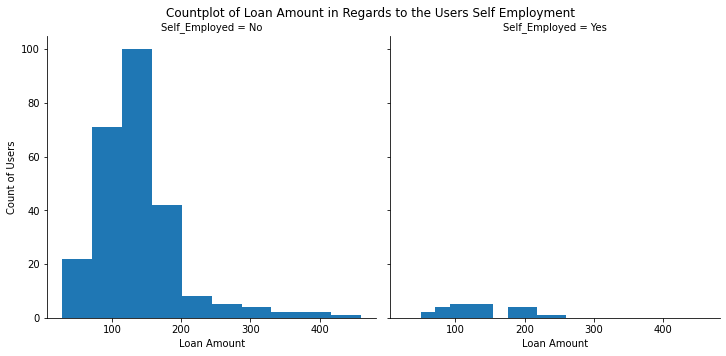

In [ ]:
#Question 9 : Does self employment have any impact on loan amount?
x = sns.FacetGrid(data = df, col = 'Self_Employed', col_wrap = 2, height = 5, margin_titles = True);
x.map(plt.hist, "LoanAmount").set_axis_labels("Loan Amount", "Count of Users");
plt.subplots_adjust(top=0.9);
x.fig.suptitle('Countplot of Loan Amount in Regards to the Users Self Employment');

Observation: A large percentage of loan takers are not self-employed. This is likely because they are perceived to have steadier incomes than self-employed people, increasing ability to pay back amount borrowed + monthly interest.

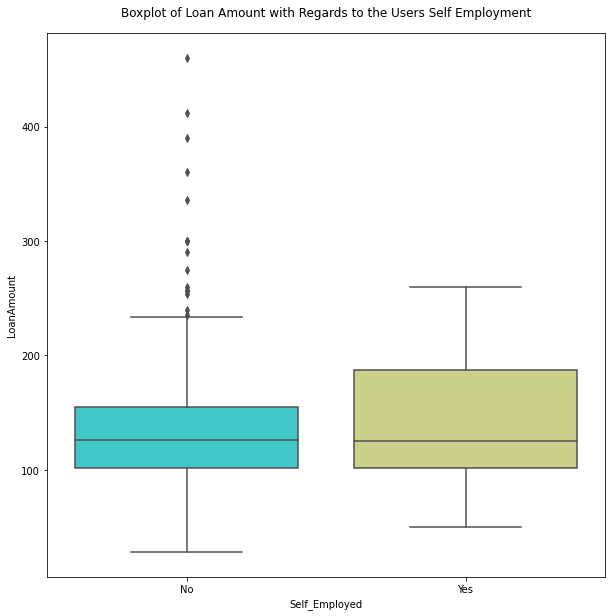

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Self_Employed', y = 'LoanAmount', data = df, palette = 'rainbow');
plt.title("Boxplot of Loan Amount with Regards to the Users Self Employment", y=1.02);

Observation: Those who are self employed take higher loans than those who are not. Though there are many high outliers on those who are not self-employed.

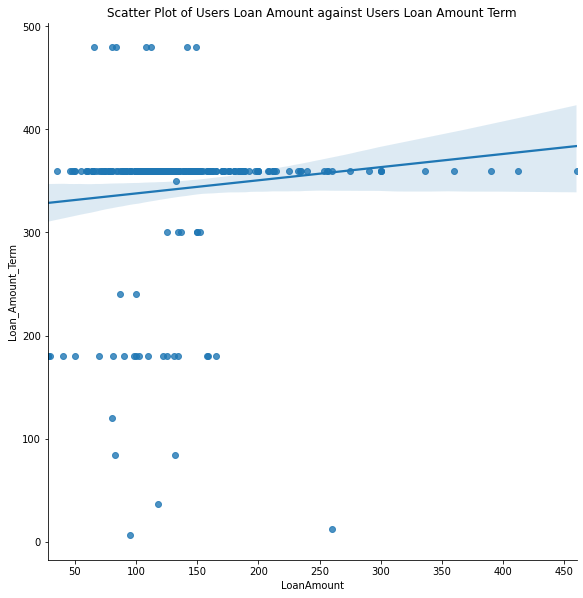

In [ ]:
#Question 10 : How does loan amount term affect the loan amount?
sns.lmplot(x = 'LoanAmount', y = 'Loan_Amount_Term', data = df, height = 8);
plt.title("Scatter Plot of Users Loan Amount against Users Loan Amount Term", y=1.02);

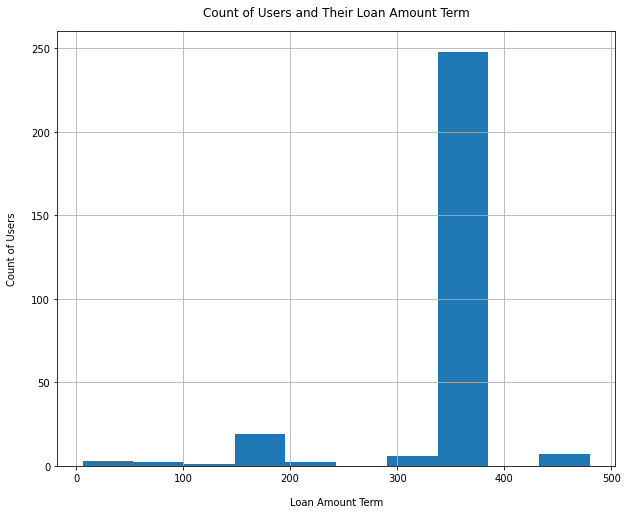

In [ ]:
df.hist(column='Loan_Amount_Term', bins=10, figsize=(10, 8));
plt.xlabel("Loan Amount Term", labelpad=14)
plt.ylabel("Count of Users", labelpad=14)
plt.title("Count of Users and Their Loan Amount Term", y=1.02);

Observation: It does not have any specific relationship, but loan amount is higher when loan term amount is around 360.

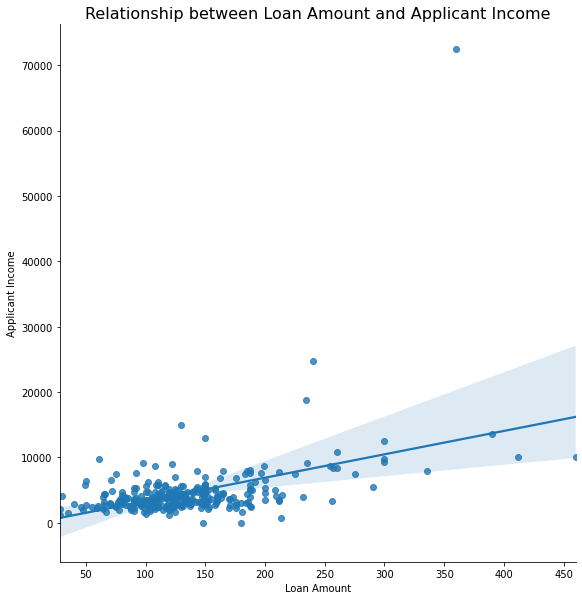

In [ ]:
#Question 11 : What is the relationship between loan amount and applicant income?
sns.lmplot(x = 'LoanAmount', y = 'ApplicantIncome', data = df, height = 8);

plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.title('Relationship between Loan Amount and Applicant Income', size=16);

Observation: The relationship between loan amount and income is positive and directly proportional, but not very strong. There are many outliers.

##Machine Learning (Linear Regression)


In [ ]:
#Importing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

###Model 1

Data Preparation


In [ ]:
#Model 1 : Using all other variables
X = df_encoded[['Gender','Married','Education','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Rural','Semiurban','Urban']]
y = df_encoded['LoanAmount']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

Data Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (201, 12)
X_test :  (87, 12)
y_train :  (201,)
y_test :  (87,)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
Gender,4.436848
Married,18.469744
Education,12.718988
Dependents,1.134425
Self_Employed,2.140200
ApplicantIncome,0.010529
CoapplicantIncome,0.005526
Loan_Amount_Term,0.081377
Credit_History,-12.975786
Rural,-0.547149


In [ ]:
lm.intercept_

39.34539365955716

Data Testing

Text(0, 0.5, 'Predicted Loan Amount')

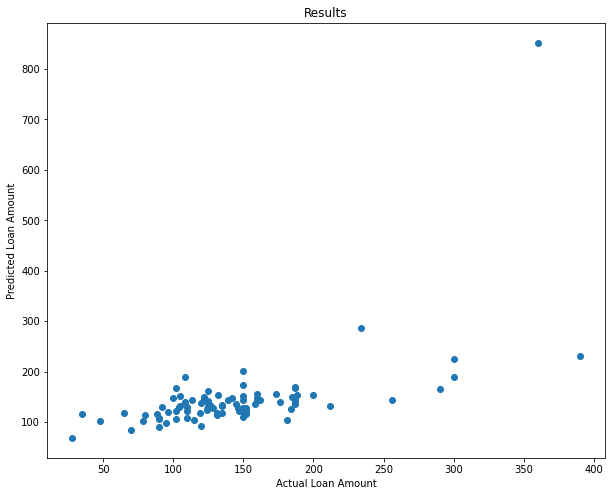

In [ ]:
predictions = lm.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")

Data Evaluation

In [ ]:
#Metrics/ Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 36.60974207991181
MSE: 4596.846524580956
RMSE: 67.80004811636165


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


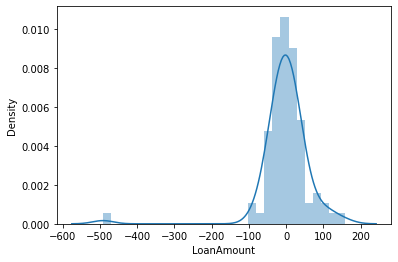

In [ ]:
sns.distplot((y_test - predictions),bins=30);

###Model 2

Data Preparation

In [ ]:
#Model 2 : Using marriage, education, applicant income, coapplicant income and number of dependents as X variables
X = df_encoded[['Married','Education','ApplicantIncome','CoapplicantIncome','Dependents']]
y = df_encoded['LoanAmount']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

Data Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (201, 5)
X_test :  (87, 5)
y_train :  (201,)
y_test :  (87,)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
Married,16.567236
Education,10.163840
ApplicantIncome,0.010465
CoapplicantIncome,0.005739
Dependents,0.773599


In [ ]:
lm.intercept_

60.642983748281154

Data Testing

Text(0, 0.5, 'Predicted Loan Amount')

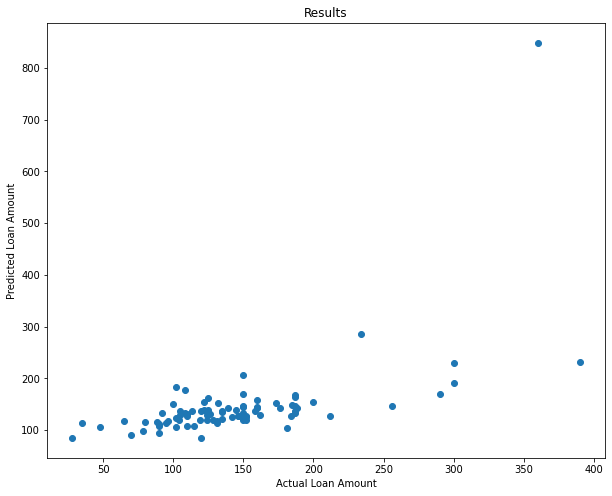

In [ ]:
predictions = lm.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")

Data Evaluation

In [ ]:
#Metrics/ Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 37.06121384456301
MSE: 4578.699842966598
RMSE: 67.66609079122716


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


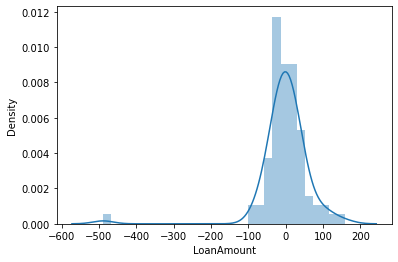

In [ ]:
sns.distplot((y_test - predictions),bins=30);

###Model 3

Data Preparation

In [ ]:
#Model 3 : Using all except gender and marriage as X variables
X = df_encoded[['Education','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Rural','Semiurban','Urban']]
y = df_encoded['LoanAmount']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

Data Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (201, 10)
X_test :  (87, 10)
y_train :  (201,)
y_test :  (87,)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
Education,13.686457
Dependents,4.779038
Self_Employed,1.972590
ApplicantIncome,0.010385
CoapplicantIncome,0.005601
Loan_Amount_Term,0.086623
Credit_History,-10.928618
Rural,0.622908
Semiurban,2.578836
Urban,-3.201744


In [ ]:
lm.intercept_

45.395476793528715

Data Testing

Text(0, 0.5, 'Predicted Loan Amount')

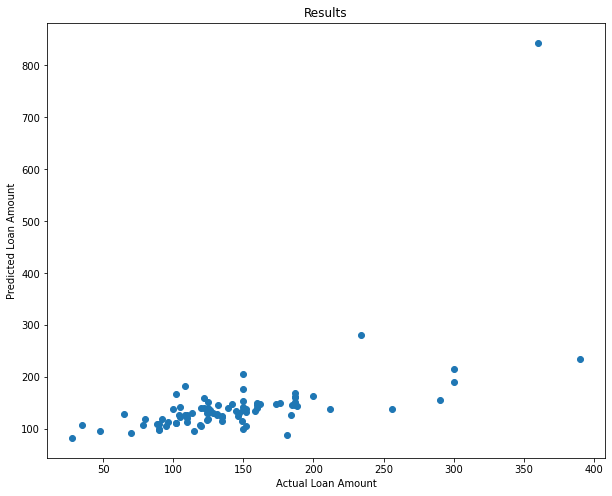

In [ ]:
predictions = lm.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")

Data Evaluation

In [ ]:
#Metrics/ Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 35.899944089287274
MSE: 4486.675905780233
RMSE: 66.98265376782435


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


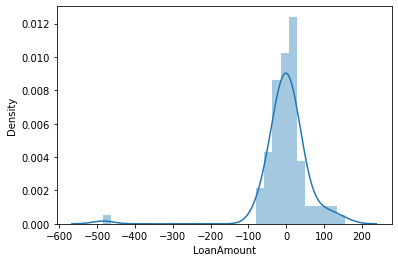

In [ ]:
sns.distplot((y_test - predictions),bins=30);

###Model 4

Data Preparation

In [ ]:
#Model 4 : Using applicant and coapplicant income, loan amount term and credit history as X variables
X = df_encoded[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History']]
y = df_encoded['LoanAmount']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

Data Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (201, 4)
X_test :  (87, 4)
y_train :  (201,)
y_test :  (87,)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
ApplicantIncome,0.011105
CoapplicantIncome,0.005738
Loan_Amount_Term,0.072152
Credit_History,-10.828892


In [ ]:
lm.intercept_

61.18738674886025

Data Testing

Text(0, 0.5, 'Predicted Loan Amount')

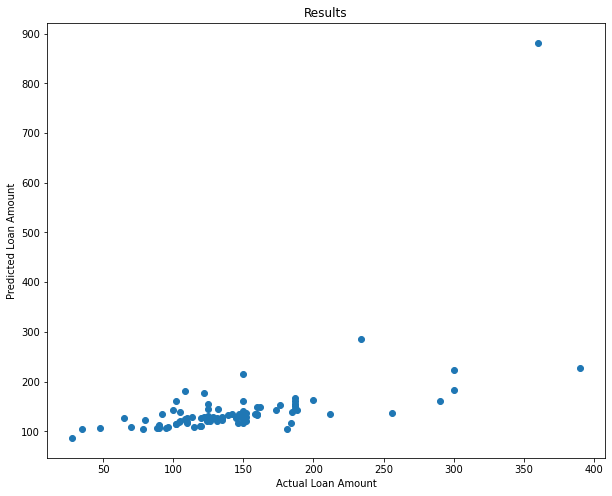

In [ ]:
predictions = lm.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")

Data Evaluation

In [ ]:
#Metrics/ Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 36.68313399850334
MSE: 4982.521031585691
RMSE: 70.58697494287236


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


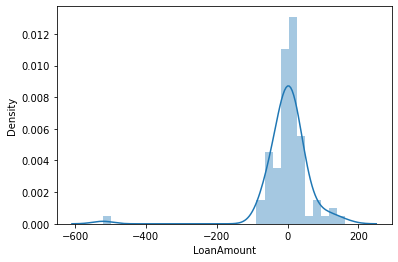

In [ ]:
sns.distplot((y_test - predictions),bins=30);

###Model 5

Data Preparation

In [ ]:
#Model 5 : Using all except gender, marriage, property area and loan amount term as X variables
X = df_encoded[['Education','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','Credit_History']]
y = df_encoded['LoanAmount']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

Data Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (201, 6)
X_test :  (87, 6)
y_train :  (201,)
y_test :  (87,)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
Education,11.382024
Dependents,4.321065
Self_Employed,-0.010660
ApplicantIncome,0.010574
CoapplicantIncome,0.005689
Credit_History,-12.915734


In [ ]:
lm.intercept_

77.61656823446938

Data Testing

Text(0, 0.5, 'Predicted Loan Amount')

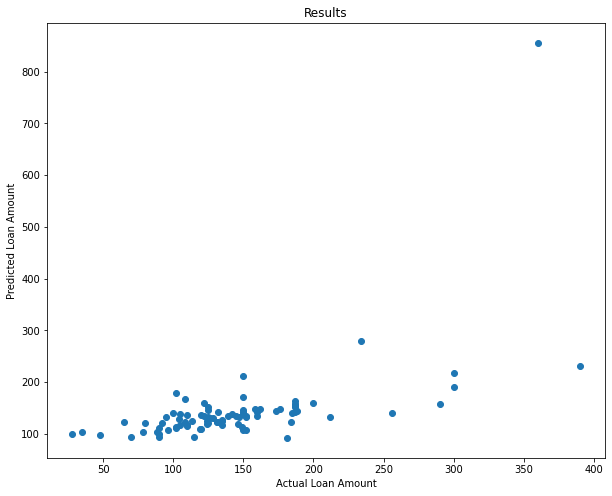

In [ ]:
predictions = lm.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")

Data Evaluation

In [ ]:
#Metrics/ Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Based on the metrics, this is the 4th best model

MAE: 36.405767341596096
MSE: 4672.077222109951
RMSE: 68.35259484547717


###Model 6

Data Preparing

In [ ]:
#Model 6 : Using education, dependents, self employed and married as X variables
X = df_encoded[['Education','Dependents','Self_Employed', 'Married']]
y = df_encoded['LoanAmount']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

Data Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (201, 4)
X_test :  (87, 4)
y_train :  (201,)
y_test :  (87,)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
Education,23.912169
Dependents,4.683687
Self_Employed,4.526883
Married,16.793466


In [ ]:
lm.intercept_

100.50939870486704

Data Testing

Text(0, 0.5, 'Predicted Loan Amount')

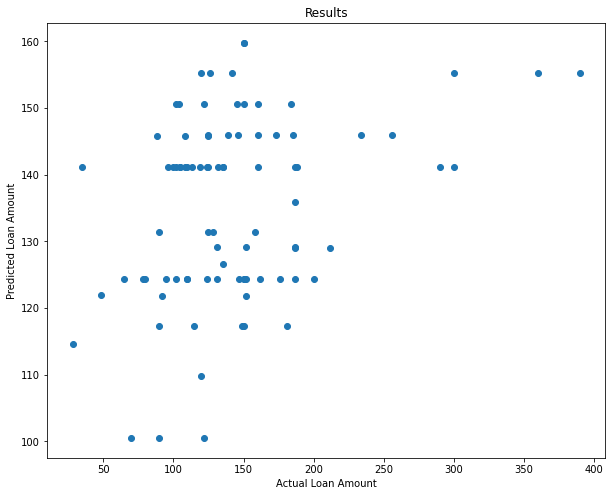

In [ ]:
predictions = lm.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")

Data Evaluation

In [ ]:
#Metrics/ Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.787514089579055
MSE: 3432.407551596824
RMSE: 58.58675235577429


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


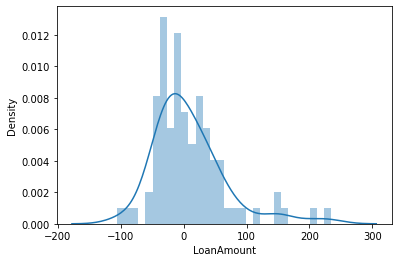

In [ ]:
sns.distplot((y_test - predictions),bins=30);

##Conclusion
- The third model using all variables except gender and marriage as X is the best as it has the lowest MAE

In this project, we trained and tested out different models that will best predict how much loan users can take. The models were then evaluated by their error rates: MAE, MSE and RMSE. Another important component of this project was to see which independent variables greatly affect the loan amount. This was assessed by EDA and the correlations, as well as removing and adding the independent variables to create the best possible model.

Based on the results, Model 3 (Dependents, Education, Self-Employed, Applicant Income, Co-applicant Income, Credit History, Property Area and Loan Amount Term as independent variables) is the best, as its MAE is by far the lowest and its MSE and RMSE are the second lowest. Even though the MSE and RMSE of Model 6 is much lower, we have decided to prioritize the MAE as it focuses more on the accuracy of the predictions against the actual values.


Recommendation: If we were to work on this project again or improve it, we could possibly explore further independent variables. Examples of this could be collateral owned by the user, amount of debt owed, and general expenses. This may help us create a better model that can predict more accurate results.